### 1. 연립방정식의 근사해
추세선은 주어진 데이터에 가장 잘 맞는 직선을 긋는 것이나 모든 점을 지나는 것은 불가능하다. 즉, 주어진 연립방정식이 해를 갖지 않는다. 이 경우 두 가지 접근법이 있다.

첫째, 최소제곱법을 이용해 가장 가까운 근사해를 찾는다.

둘째, 선형회귀를 이용해 근사해를 찾는다.

### 2. 최소제곱해와 정규방정식

2.428571428571433 78.99999999999999


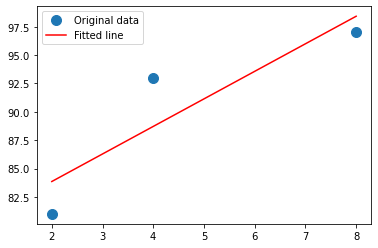

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([2, 4, 8])
A = np.array([[1]*len(x), x]).T
y = np.array([81, 93, 97])

c, m = np.linalg.lstsq(A, y, rcond=None)[0] # 최소자승 해 풀기 (Compute the Least-squares solution)

print(m, c)

plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.show()

$b_c := A\hat{x}$

#### $A^T(b-A\hat{x})=0 \iff A^T A\hat{x}=A^T b$

### 3. 정규방정식의 해 표현
$rank(A)=n+1$, 즉 full rank인 경우 (대부분의 경우 A는 full rank)를 갖는다. 피쳐가 서로 독립적이면 무조건 그렇고, 그렇지 않더라도 피쳐 엔지니어링(유사한 피쳐 제거, PCA 등의 차원축소 등)을 거치면 대부분 그렇게 됩니다.

이 경우에는 $A^T A$의 역행렬이 존재하기 때문에 다음과 같이 간단하게 최소제곱해를 얻을수  있습니다.

$x = (A^T A)^{-1} A b$

In [3]:
import numpy as np

x = np.array([2, 4, 8])
A = np.array([[1]*len(x), x]).T
y = np.array([81, 93, 97])

print(np.matmul(A.T, A)) # 행렬곱
print(np.matmul(A.T, y)) # 행렬곱
print(np.linalg.inv(np.matmul(A.T, A)))
# [ 3/2, -1/4]
# [-1/4, 3/56]
print(np.matmul(np.linalg.inv(np.matmul(A.T, A)), np.matmul(A.T, y)))
# (79, 17/7)

[[ 3 14]
 [14 84]]
[ 271 1310]
[[ 1.5        -0.25      ]
 [-0.25        0.05357143]]
[79.          2.42857143]


### 4. 선형회귀

In [7]:
import numpy as np

# 관측된 x, y를 데이터로 삼습니다.
x_train = np.array([2, 4, 8])
y_train = np.array([81, 93, 97])

# 학습해야 할 파라미터 W, b를 놓고
W, b = np.array([0.0, 0.0])
n_data = len(x_train)
epochs = 2000
learning_rate = 0.01

# 루프를 돌면서 
for i in range(epochs):
    hypothesis = x_train * W + b
    cost = np.sum((hypothesis - y_train) ** 2) / n_data
    # gradient를 계산하여
    gradient_w = np.sum((W * x_train - y_train + b) * 2 * x_train) / n_data
    gradient_b = np.sum((W * x_train - y_train + b) * 2) / n_data

    if i % 100 == 0:
        print('Epoch ({:10d}/{:10d}) cost: {:10f}, W: {:10f}, b:{:10f}'.format(i, epochs, cost, W, b))

    # 그래디언트 반대 방향으로 파라미터를 업데이트합니다. 
    W -= learning_rate * gradient_w
    b -= learning_rate * gradient_b


print('W: {:10f}'.format(W))
print('b: {:10f}'.format(b))
print('result : ', x_train * W + b)

Epoch (         0/      2000) cost: 8206.333333, W:   0.000000, b:  0.000000
Epoch (       100/      2000) cost: 555.446152, W:  10.752730, b: 29.440640
Epoch (       200/      2000) cost: 239.027498, W:   7.825787, b: 46.866718
Epoch (       300/      2000) cost: 106.006292, W:   5.928016, b: 58.165432
Epoch (       400/      2000) cost:  50.084681, W:   4.697540, b: 65.491290
Epoch (       500/      2000) cost:  26.575446, W:   3.899725, b: 70.241227
Epoch (       600/      2000) cost:  16.692253, W:   3.382437, b: 73.320989
Epoch (       700/      2000) cost:  12.537396, W:   3.047039, b: 75.317845
Epoch (       800/      2000) cost:  10.790710, W:   2.829573, b: 76.612565
Epoch (       900/      2000) cost:  10.056410, W:   2.688573, b: 77.452036
Epoch (      1000/      2000) cost:   9.747713, W:   2.597151, b: 77.996332
Epoch (      1100/      2000) cost:   9.617938, W:   2.537875, b: 78.349242
Epoch (      1200/      2000) cost:   9.563381, W:   2.499442, b: 78.578062
Epoch (    

- 회귀 모델을 학습시킬 때: 주로 손실함수를 MSE(Mean Squared Error)로 택해 최소화시키는 방식으로 학습
- 학습방법은 경사하강법(GD, Gradient Descent)을 사용
- 손실함수를 최소화: Gradient 벡터의 크기가 가장 빠르게 감소하는 방향으로 가중치를 학습

### 5. 경사하강법
손실함수(Loss function)을 정의하고 그 최솟값을 찾는 작업에 사용된다.
- 그래디언트 벡터는 레벨셋에 수직이고 그래디언트 방향이 함수가 가장 급하게 증가하는 방향이다.
- 경사하강법(Gradient descent)은 여기에 착안하여 순간순간 그래디언트 벡터의 반대(음의 그래디언트) 방향으로 이동하며 최솟값을 찾아가는 방법이다.
- 한번에 너무 많이 점프하면 오버슈팅이 일어날 수 있고, 너무 적게 점프하면 수렴속도가 너무 느려진다.
- 이렇게 점프하는 정도를 조절하는 하이퍼파라미터(Hyperparameter)가 학습률(Learning rate)이다.
- 학습 초기에는 학습률을 좀더 높게 잡아줬다가 뒤로가면 미세조절을 위해 작게 잡아주는 방식을 많이 택한다.
- 경사하강법이 갖는 문제점 중 하나는 컨벡스 문제(Convex problem)이 아닌 경우, 즉, 손실함수가 볼록이 아닐 경우, 최솟값(Global minimum)이 아니라 극솟값(Local minimum)으로 수렴할수 있다.
- 실제로는 평지(Plateau, 수학적으로는 saddle point에 해당)가 생겨서 weight 업데이트가 거의 일어나지 않는 현상이 훨씬 문제가 된다.

### 6. 옵티마이저
#### 6-0. 경사하강법(GD, Gradient Descent)
뉴럴넷의 weight들을 모아놓은 벡터를 w라고 했을 때, 뉴럴넷에서 내놓는 결과값과 실제 결과값 사이의 차이를 정의하는 손실함수 C(w)의 값을 최소화하기 위해 gradient의 반대 방향으로 일정 크기만큼 이동해내는 것을 반복하여 손실함수의 값을 최소화하는 w의 값을 찾는 알고리즘을 경사하강법(GD)이라 한다.

$w_{t+1}=w_t−\eta\nabla_{w_t} C(w_t)$

η가 미리 정해진 걸음의 크기(step size)로서, 위에서 언급한 하이퍼파라미터인 학습률(Learning rate)이구요. 보통 0.01~0.001 정도의 적당한 크기를 사용하고, 보통 학습 초기에는 학습률을 좀더 높게 잡아줬다가 뒤로가면 미세조절을 위해 작게 잡아주는 방식을 많이 택한다.

#### 6-1. 확률적 경사하강법(SGD, Stochastic Gradient Descent)
- GD에서는 한번 step을 내딛을 때 전체 훈련 데이터에 대해 손실함수를 계산해야 하므로 너무 많은 계산량이 필요해서 속도가 엄청 느리다. 이를 방지하기 위해 보통 확률적 경사하강법(SGD)를 사용한다.
- 손실함수를 계산할 때 전체 데이터(total batch) 대신 일부 조그마한 데이터의 모음(mini-batch)에 대해서만 손실함수를 계산하기 대문에 GD보다 다소 부정확할 수는 있지만, 훨씬 계산 속도가 빠르기 때문에 같은 시간에 더 많은 step을 갈 수 있으며 여러 번 반복할 경우 보통 batch의 결과와 유사한 결과로 수렴한다.
- GD에 비해 빠르다는거지 앞으로 소개할 방법들에 비하면 굉장히 느리다. 
- SGD를 사용할 경우 GD에 비해 local minima에 빠지지 않고 더 좋은 방향으로 수렴할 가능성도 있다.

##### 6-2. 모멘텀(Momentum)
- Momentum 방식은 말 그대로 SGD를 통해 이동하는 과정에 일종의 '관성'을 주는 것이다. 현재 gradient를 통해 이동하는 방향과는 별개로, 과거에 이동했던 방식을 기억하면서 그 방향으로 일정 정도를 추가적으로 이동하는 방식이다.

$v_t$는 time step t에서의 이동벡터를 의미하다.

$v_{t+1} = m v_t + \eta \nabla_{w_t} C(w_t)$
$w_t=w_{t-1}−v_t$

이 때, m은 얼마나 momentum을 줄 것인지에 대한 관성항 값으로, 보통 0.9 정도의 값을 사용해요. 식을 살펴보면 과거에 얼마나 이동했는지에 대한 이동 항 vt에 관성항 값을 곱하고 gradient 벡터에 step size η를 곱해서 더해준다.

관성 효과로 인해 양(+) 방향, 음(-) 방향 순차적으로 일어나는 지그재그 현상이 줄어든다는 거예요. 진동을 하더라도 중앙으로 가는 방향에 힘을 얻기 때문에 SGD에 비해 상대적으로 빠르게 이동할 수 있다.

#### 6-3. 아다그래드(Adagrad)
- Adagrad는 변수들을 업데이트 할때 각각의 변수마다 step size를 다르게 설정해서 이동하는 방식
- '지금까지 많이 변화하지 않은 변수들은 step size를 크게 하고, 지금까지 많이 변화했던 변수들은 step size를 작게 하자' 
- 자주 등장하거나 변화를 많이 한 변수들의 경우 optimum에 가까이 있을 확률이 높기 때문에 작은 크기로 이동하면서 세밀한 값을 조정하고, 적게 변화한 변수들은 optimum 값에 도달하기 위해서는 많이 이동해야할 확률이 높기 때문에 먼저 빠르게 loss 값을 줄이는 방향으로 이동하려는 방식
- 특히 word2vec이나 GloVe 같이 word representation을 학습시킬 경우 단어의 등장 확률에 따라 variable의 사용 비율이 확연하게 차이나기 때문에 Adagrad와 같은 학습 방식을 이용하면 훨씬 더 좋은 성능을 거둘 수 있다.

$G_{t+1} = G_t + (\nabla_{w_t} C(w_t))^2$

$w_{t+1} = w_t - \frac{\eta}{\sqrt{G_t+\epsilon}} \cdot \nabla_{w_t} C(w_t)$

$G_t+1$을 업데이트하는 식에서 제곱은 element-wise 제곱을 의미하며, $W_t+1$을 업데이트하는 식에서도 ⋅ 은 element-wise한 연산을 의미한다.

참고: element-wise 제곱 (요소별 연산) ex. 행렬 덧셈 빽셈

- Adagrad를 사용하면 학습을 진행하면서 굳이 step size decay등을 신경써주지 않아도 된다는 장점이 있다. 보통 Adagrad에서 step size로는 0.01 정도를 사용한 뒤, 그 이후로는 바꾸지 않는다.
- 반면, Adagrad에는 학습을 계속 진행하면 step size가 너무 줄어든다는 문제점이 있다. G에는 계속 제곱한 값을 넣어주기 때문에 G의 값들은 계속해서 증가하기 때문에, 학습이 오래 진행될 경우 step size가 너무 작아져서 결국 거의 움직이지 않게 된다.


#### 6-4. RMSProp
 Adagrad의 단점을 해결하기 위한 방법이다. Adagrad의 식에서 gradient의 제곱값을 더해나가면서 구한 Gt 부분을 합이 아니라 지수평균(Exponential Average)으로 바꾸어서 대체한 방법이다.
 
 이렇게 대체를 할 경우 Adagrad처럼 Gt가 무한정 커지지는 않으면서 최근 변화량의 변수간 상대적인 크기 차이는 유지할 수 있다.

#### 6-5. 아담(Adam)
Adam은 RMSProp과 Momentum 방식을 합친 것 같은 알고리즘이다. 이 방식에서는 Momentum 방식과 유사하게 지금까지 계산해온 기울기의 지수평균을 저장하며, RMSProp과 유사하게 기울기의 제곱값의 지수평균을 저장한다.

다만, Adam에서는 m과 v가 처음에 0으로 초기화되어 있기 때문에 학습의 초반부에서는 mt, vt가 0에 가깝게 bias 되어있을 것이라고 판단하여 이를 unbiased 하게 만들어주는 작업을 거친다.

보통 β1로는 0.9, β2로는 0.999, ϵ으로는 $10^-8$ 정도의 값을 사용한다.